# K-Means

## Implementation

We are going to directly implement the K-Means algorithm in Python.

We load the necessary modules:

In [ ]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

To load data from Drive, we must first authorize access to it:

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

And now we load the [dataset](https://drive.google.com/open?id=1Ccs2xsblBGcOmM9s3UYyimDiPVj2SlEi):

In [ ]:
import pandas as pd  

data_id = "1Ccs2xsblBGcOmM9s3UYyimDiPVj2SlEi"
data_downloaded = drive.CreateFile({'id':data_id}) 
data_downloaded.GetContentFile('Data_Filename.csv') 

data = pd.read_csv('Data_Filename.csv')


And we took a look at it:

In [ ]:
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


And we show them on a two-dimensional space:

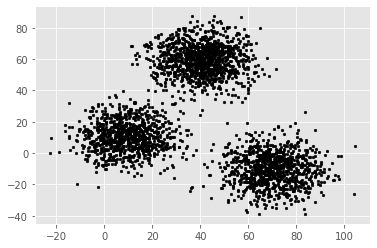

In [ ]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

We implement the Euclidean distance:

In [ ]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

We randomly generate the initial 3 centroids:

In [ ]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[49. 34.]
 [13. 70.]
 [36. 27.]]


We see where they are located in two-dimensional space:

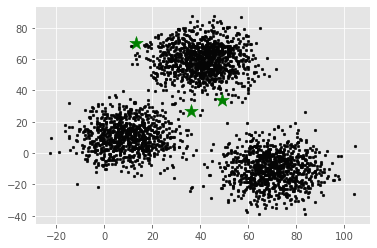

In [ ]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

Now we iterate over the set of points by calculating their Euclidean distance to each of the centroids and updating the nearest centroid:

In [ ]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Labels(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    print("iteration")
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
print("done!")

iteration
iteration
iteration
iteration
done!


We visualize the result:

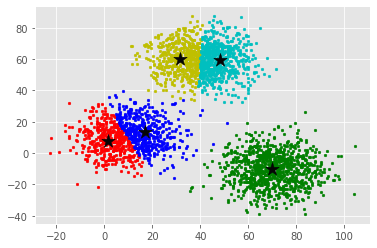

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


Test with different values of k: 2, 4, 5, 6
And we show them on a two-dimensional space:


## Spherical Data


We create a dataset with 2000 points, 
and we show them on a two-dimensional space:


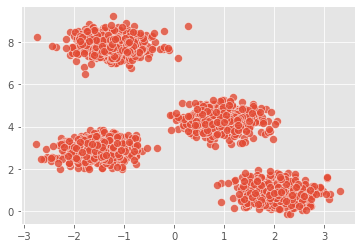

In [ ]:
import numpy as np
from sklearn import datasets

N_samples = 2000

dataset_1 = np.array(datasets.make_blobs(n_samples=N_samples,
  centers=4, cluster_std=0.4, random_state=0)[0])

import matplotlib.pyplot as plt

plt.scatter(dataset_1[:,0], dataset_1[:,1],
            alpha=0.8, s=64, edgecolors='white')
plt.show()


We applied K-Means, with k=4, to visualize the detected groups:

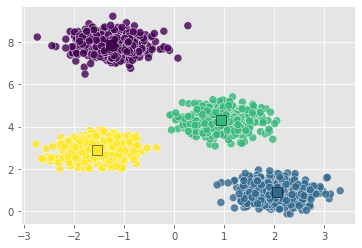

In [ ]:
from sklearn.cluster import KMeans

K_dataset_1 = 4
km_1 = KMeans(n_clusters=K_dataset_1)
labels_1 = km_1.fit(dataset_1).labels_ 

plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1,
                   alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1],
             marker='s', s=100, c=np.unique(labels_1), edgecolors='black')
plt.show()

As expected, the plotted result is excellent.

The centroids and clusters are exactly what we had in mind when we looked at the unlabeled data set.

## Non-Spherical Data

Now we are going to distribute the points in concentric rings.

This is a rather tricky problem because the clusters represented are not spherical:

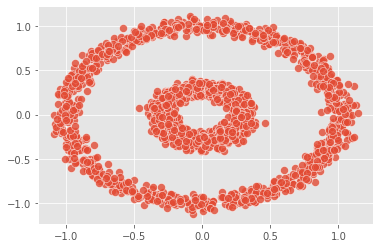

In [ ]:
import numpy as np
from sklearn import datasets

N_samples = 2000

dataset_2 = np.array(datasets.make_circles(n_samples=N_samples,
  noise=0.05, factor=0.3)[0])

import matplotlib.pyplot as plt

plt.scatter(dataset_2[:,0], dataset_2[:,1],
            alpha=0.8, s=64, edgecolors='white')
plt.show()

And now we apply k-means with k=2:

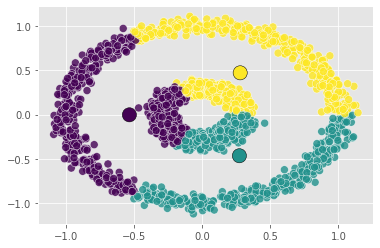

In [ ]:
from sklearn.cluster import KMeans

K_dataset_2 = 3
km_2 = KMeans(n_clusters=K_dataset_2)
labels_2 = km_2.fit(dataset_2).labels_ 

plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2,
                   alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1],
                   s=200, c=np.unique(labels_2), edgecolors='black')
plt.show()

As you can see, K-Means is not performing very well on this dataset, because it expects spherically shaped data clusters.





#  Exercises

## Titanic Survivors

We are going to use the famous Titanic dataset (available on [kaggle](https://www.kaggle.com/c/titanic)).

As you all know, on April 15, 1912, during its maiden voyage, the Titanic sank after hitting an iceberg, killing 1502 of the 2224 passengers and crew.

One of the reasons the sinking caused such a loss of life was that there were not enough lifeboats for the passengers and crew. Some groups of people were more likely to survive than others, such as women, children and the upper class.

As for the dataset we are going to use it contains several records about the Titanic's passengers. It has 12 features that capture information about passenger class, embarkation port, passenger fare, etc. The label of the dataset is survival, which denotes the survival status of a particular passenger.

We are tasked with building a model capable of grouping the records into two groups, i.e., those that survived and those that did not survive.

The fact that the records are already labeled with that information will help us to evaluate the performance of the model we have built.

In [ ]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

To load the data from Drive, we must first authorize its access via:

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The dataset is divided into:

*   Training set: available [here](https://drive.google.com/open?id=1jabmC8BKIl55_nYSDto4UisZ4QOdKoeV)
*   Evaluation set: available [here](https://drive.google.com/open?id=1BUMWDwQ2riXDE6VW8jz5COc-pXJYs7zz)



In [ ]:
import pandas as pd  

train_id = "1jabmC8BKIl55_nYSDto4UisZ4QOdKoeV"
train_downloaded = drive.CreateFile({'id':train_id}) 
train_downloaded.GetContentFile('Train_Filename.csv')  
train = pd.read_csv('Train_Filename.csv')

test_id = "1BUMWDwQ2riXDE6VW8jz5COc-pXJYs7zz"
test_downloaded = drive.CreateFile({'id':test_id}) 
test_downloaded.GetContentFile('Test_Filename.csv')  
test = pd.read_csv('Test_Filename.csv')



Let's see the type of data we are going to work with by showing some rows of the training and evaluation set:

In [ ]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


***** Test_Set *****
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


We can have some initial statistics using the `describe` method of the DataFrame:

In [ ]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


***** Test_Set *****
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000 

Let's look at each of the attributes we are going to work with:

In [ ]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Note that not all machine learning algorithms support null values in the input data.

K-Means is one of them, so we have to handle this type of values in the data.

Let's first see where the missing values are:

In [ ]:
# For the train set
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
# For the test set
test.isna().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


Let's see the total number of missing values in both sets:

In [ ]:
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


As you can see in the training set, there are missing values in the `Age`, `Cabin` and `Embarked` columns.

In the case of the evaluation set, there are missing values in the `Age`, `Fare` and `Cabin` columns.

We can solve this in two ways:

Deleting the rows with those null values.
Calculating the missing values
The second option is more advisable, since deleting records and with it other information that may be relevant is not a good idea.

Well, now we have several ways to calculate those missing data:

Assign a constant value that makes sense in the domain, and that is different from the rest of the assigned values (e.g. 0).
A value taken randomly from another record.
The mean, or median, or mode, calculated from the rest of the values of that dimension.
A value estimated by another machine learning model.
The technique we decide will have to be applied both in the training set and in the possible future inferences we make with the model.

`Pandas` offers the `fillna()` function to assign a specific value to those empty fields. We are going to apply it with the average value of the dimension:





In [ ]:
# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)

In [ ]:
# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

Let us now check again whether there are null values in our data sets:

In [ ]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


The same for the evaluation set:

In [ ]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


There are still null values in the data. The reason is that these fields are not numeric, so it cannot be calculated from the mean.

Let's see which attributes are categorical and which are numeric:

* Categorical: `Survival`, `Sex`, and `Embarked`. 
* Ordinal: `Pclass`
* Continuous: `Age`, `Fare`. 
* Discrete: `SibSp`, `Parch`.

There are two elements `Cabin` and `Ticket` that are alphanumeric.

Let's see some records:


In [ ]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [ ]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

Let's calculate the number of surviving passengers with respect to: `Pclass`, `Sex`, `SibSp`, `Parch`.

`Survived` vs `Pclass`:

In [ ]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


`Survived` vs `Sex`: 

In [ ]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


As you can see, the percentage of female survivors is much higher than that of male survivors.

`Survived` vs `SibSp`:

In [ ]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Let's compare the values of `Age` and `Survived`:

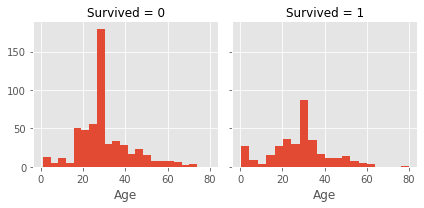

In [ ]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Let's see the behavior between `Pclass` and `Survived`:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


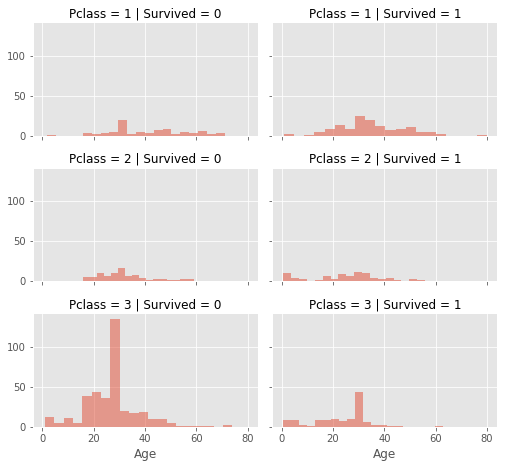

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

We now have a more precise idea of the type of information we are dealing with.

Before training the model, let's look at the attribute data types:

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are several attributes that are not numeric: `Name`, `Sex`, `Ticket`, `Cabin` y `Embarked`. 

In order to use them in training, they must first be converted to numerical values.

There are attributes that have no relationship with passenger survival (e.g. `Name`, `Ticket`, `Cabin`y `Embarked`). We should always avoid training the model with unnecessary variables, both for efficiency reasons and for the quality of the final results. This analysis should be more in-depth, but for now it is sufficient to eliminate these attributes from the training set: 

In [ ]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

Now all we have left is the `Sex` field as a non-numeric attribute. 

To convert it we will use the technique [Label Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

It is trained with all the values it takes in both sets, training and evaluation, and assigns numeric values that replace the existing ones.

Let's check again the type of the attributes:

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


Now we have all the non-null numeric attributes.

We can now train the model, but first we will remove the `Survived` field from the training set:

In [ ]:
X = np.array(train.drop(['Survived'], 1).astype(float))

In [ ]:
y = np.array(train['Survived'])

And we check the data that we will use for training the model:

In [ ]:
  train.drop(['Survived'], 1).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Now we train a K-Means model with k=2 (survive yes or no):

In [ ]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(n_clusters=2)

Let's check how many records were grouped correctly:

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.5084175084175084


Well, not bad. Half of the data is well grouped.

Let's see if we can adjust some other parameters to improve that performance.

Keeping in mind that we are using the  [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) implementation of scikit-learn, we have the following parameters: `algorithm`, `max_iter` y `n_jobs`. 


In [ ]:
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=2)

And, again, we evaluate the result:

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


In fact, we have gotten worse.

One of the characteristics of the K-Means algorithm is that it is very sensitive to high values of its variables. We have not normalized the attribute values, so those variables with higher values dominate the rest of the variables.

We will normalize all values between 0-1:

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

And we train the model again on the elements with normalized values:

In [ ]:
kmeans.fit(X_scaled)

KMeans(max_iter=600, n_clusters=2)

We check its performance again:

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6262626262626263


Now we have improved its accuracy.

We have been able to load the data from Google Drive, pre-process it, analyze its variables, train the model and adjust its values to improve its performance.

We have been able to test its performance when the variables are not normalized and their value ranges differ a lot.

## Compress an Image

Another interesting application of partitional grouping with global criteria is color compression within images.

Most images have a large number of colors that will not (really) be used, and many of the pixels in the image will have similar or even identical colors.

For example, we take the following image from the Scikit-Learn dataset module

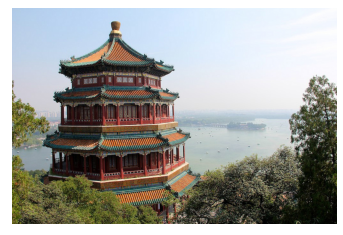

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

The image is stored in a three-dimensional array of size ``(height, width, RGB)``, containing red/blue/green contributions as integers from 0 to 255:

In [ ]:
china.shape

(427, 640, 3)

We can view this set of pixels as a point cloud in three-dimensional color space.

We rescale the data to[n_samples x n_features], and normalize the colors to be between 0 and 1:

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In each position of the array we have the intensity (0-1) of each color: red (R), green (G) and blue (B). 

In [ ]:
data[0]

array([0.68235294, 0.78823529, 0.90588235])

We define a function that projects pixels into two-dimensional spaces of feature pairs:

In [ ]:
import numpy as np

def plot_pixels(data, title, colors=None, N=100):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Display only a sample of 10000 points:

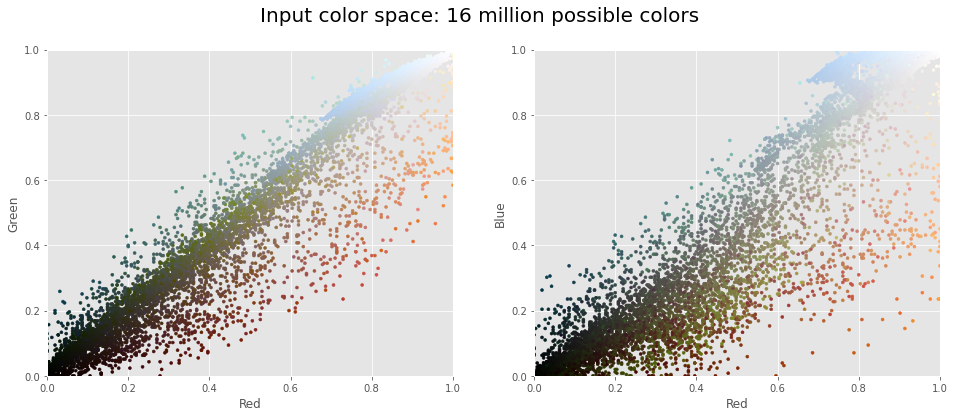

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors', N=10000)

And now we reduce these 16 million colors to only 2 colors.

We use k-means to identify those 2 groups (colors) that will allow to describe the image through its pixels.

Since the data set is very large, we use the mini batch k-means approach to work with small incremental samples:

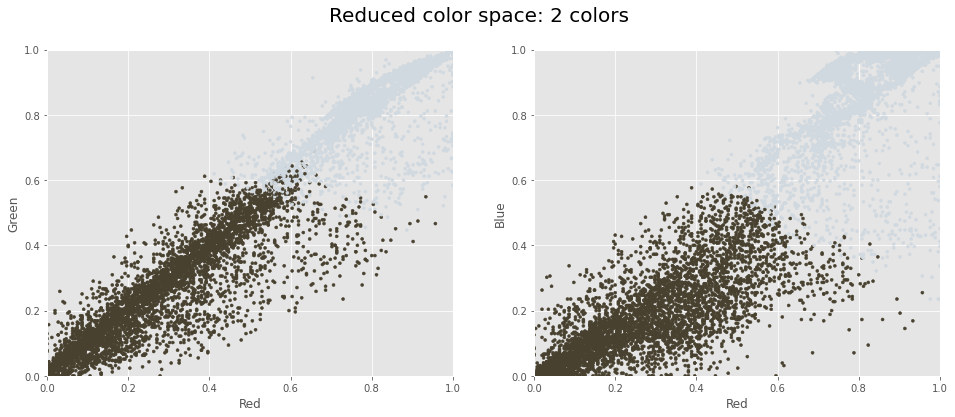

In [ ]:
import warnings; warnings.simplefilter('ignore') 
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 2 colors", N=10000)

Now we can transform the original pixels by the 16 colors (groups) identified in our model.

In this way we will have reduced the size of an image with 16M colors to only 16 colors:

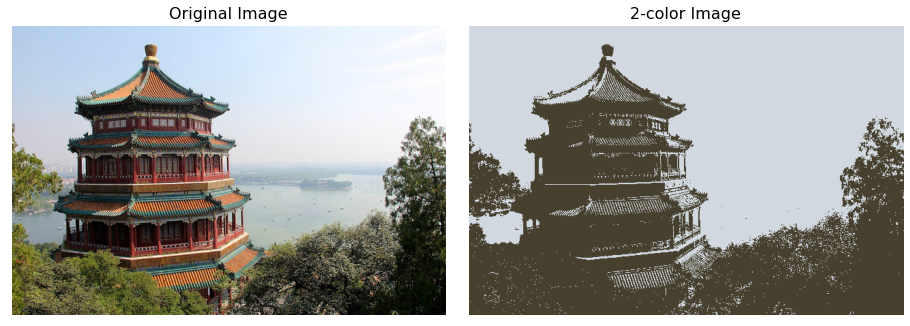

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('2-color Image', size=16);